In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data_set = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing UCB

In [3]:
N = 10000  #number od customers
d = 10    #number of Ads
ads_selectes = [] #ads selected at nth round
number_of_selections = [0] * d #no of times the ad i was selected up to nth round
sums_of_rewards = [0] * d     #sum of rewards of the ad i up to nth round

In [4]:
total_rewards = 0

In [5]:
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0 , d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selectes.append(ad)
    number_of_selections[ad] += 1
    reward = data_set.values[n][ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward

### Visualising the results

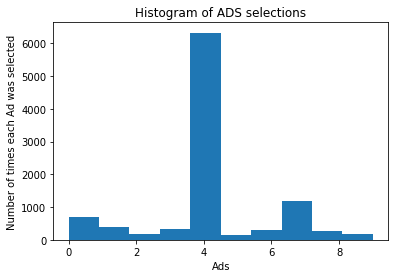

In [6]:
plt.hist(ads_selectes)
plt.title('Histogram of ADS selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()